In [1]:
!pip install pandas plotly matplotlib seaborn nbformat scikit-learn --quiet

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn import preprocessing
from urllib.request import urlretrieve
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
%matplotlib inline

In [3]:
# Download and save the CSV file
medical_url = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'
urlretrieve(medical_url, 'medical.csv')  # <-- Save it properly as 'medical.csv'


('medical.csv', <http.client.HTTPMessage at 0x1f795853c50>)

In [4]:
medical_df = pd.read_csv('medical.csv')

# Basic exploration
print(medical_df.head(10))
print(medical_df.info())
print(medical_df.describe())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
7   37  female  27.740         3     no  northwest   7281.50560
8   37    male  29.830         2     no  northeast   6406.41070
9   60  female  25.840         0     no  northwest  28923.13692
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   flo

In [5]:
# Set seaborn/matplotlib style
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (16, 6)
matplotlib.rcParams['figure.facecolor'] = '#ffffff'  # white


In [6]:
# Plot distribution using Plotly
fig = px.histogram(
    medical_df,
    x='age',
    marginal='box',
    nbins=47,
    title='Distribution of Age'
)
fig.update_layout(bargap=0.1)
fig.show()

In [7]:
fig=px.histogram(
    medical_df,
    x='bmi',
    marginal='box',
    color_discrete_sequence=['red'],
    title='Distribution of BMI'
)
fig.update_layout(bargap=0.1)
fig.show()

In [8]:
fig=px.histogram(
    medical_df,
    x='charges',
    marginal='box',
    color='smoker',
    color_discrete_sequence=['green','grey'],
    title='Disribution of charges'
)
fig.update_layout(bargap=0.1)
fig.show()

In [9]:
medical_df.sex.value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [10]:
medical_df.region.value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [11]:
fig=px.histogram(
    medical_df,
    x='charges',
    marginal='box',
    color='sex',
    color_discrete_sequence=['green','grey'],
    title='Disribution of charges based on sex'
)
fig.update_layout(bargap=0.1)
fig.show()

In [12]:
fig=px.histogram(
    medical_df,
    x='charges',
    marginal='box',
    color='region',
    color_discrete_sequence=['green','grey','brown', 'red'],
    title='Disribution of charges based on region'
)
fig.update_layout(bargap=0.1)
fig.show()

In [13]:
fig=px.histogram(
    medical_df,
    x='smoker',
    color='sex',
    color_discrete_sequence=['red','blue'],
    title='Distribution of sex based on smoker'
)
fig.update_layout(bargap=0.1)
fig.show()

In [14]:
fig=px.scatter(medical_df,
               x='age',
               y='charges',
               color='smoker',
               color_discrete_sequence=['red','green'],
               opacity=0.8,
               hover_data='sex',
               title='Distribution of sex and charges based on smoker')
fig.update_traces(marker_size=5)
fig.show()

In [15]:
fig=px.scatter(medical_df,
               x='bmi',
               y='charges',
               color='smoker',
               color_discrete_sequence=['red','green'],
               opacity=0.8,
               hover_data='sex',
               title='Distribution of bmi and charges based on smoker')
fig.update_traces(marker_size=5)
fig.show()

In [16]:
medical_df.children.value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [17]:
fig = px.violin(
    medical_df,
    x='children',
    y='charges',
    # color='smoker',
    # color_discrete_sequence=['red', 'green'],
    hover_data=['sex','bmi'],  # should be a list
    title='Distribution of children and charges based on smoker'
)

fig.update_traces(marker_size=5)
fig.show()


In [18]:
medical_df.charges.corr(medical_df.age)

np.float64(0.2990081933306478)

In [19]:
medical_df.charges.corr(medical_df.bmi)

np.float64(0.19834096883362887)

In [20]:
medical_df.charges.corr(medical_df.children)

np.float64(0.06799822684790487)

In [21]:
print(medical_df.smoker)
smoker_val={'no':0,'yes':1}
smoker_numeric=medical_df.smoker.map(smoker_val)
print(smoker_val)
print(smoker_numeric)

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object
{'no': 0, 'yes': 1}
0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64


In [22]:
medical_df.charges.corr(smoker_numeric)

np.float64(0.7872514304984778)

In [23]:
medical_df.select_dtypes(include='number').corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Text(0.5, 1.0, 'corelation matrix')

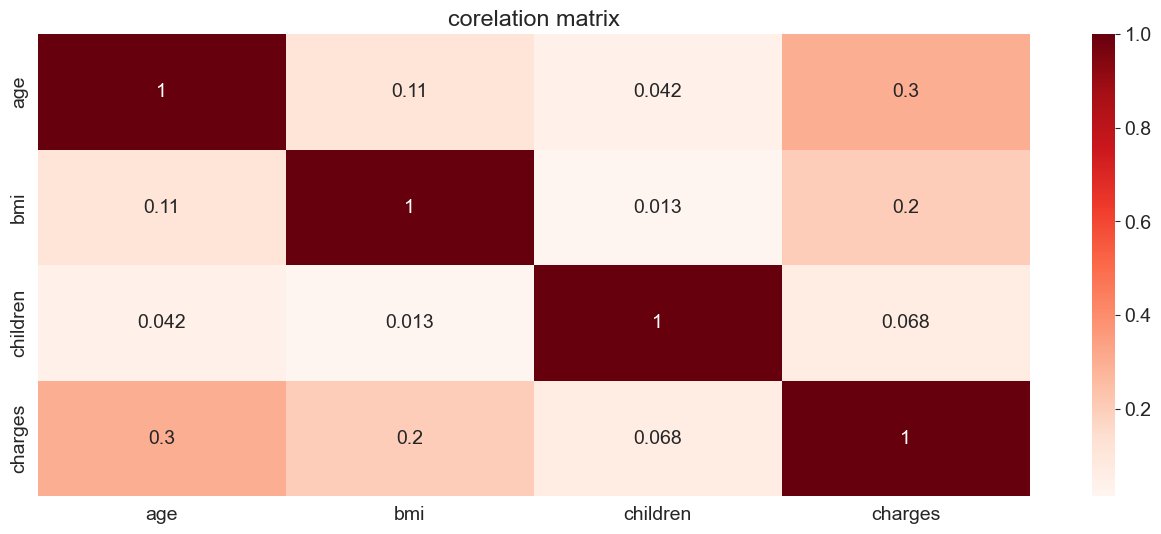

In [24]:
numeric_df = medical_df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(),cmap='Reds',annot=True)
plt.title('corelation matrix')

**Non smokers**

In [25]:
non_smokers_df=medical_df[medical_df.smoker=='no']
non_smokers_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


<Axes: title={'center': 'Age vs Charge'}, xlabel='age', ylabel='charges'>

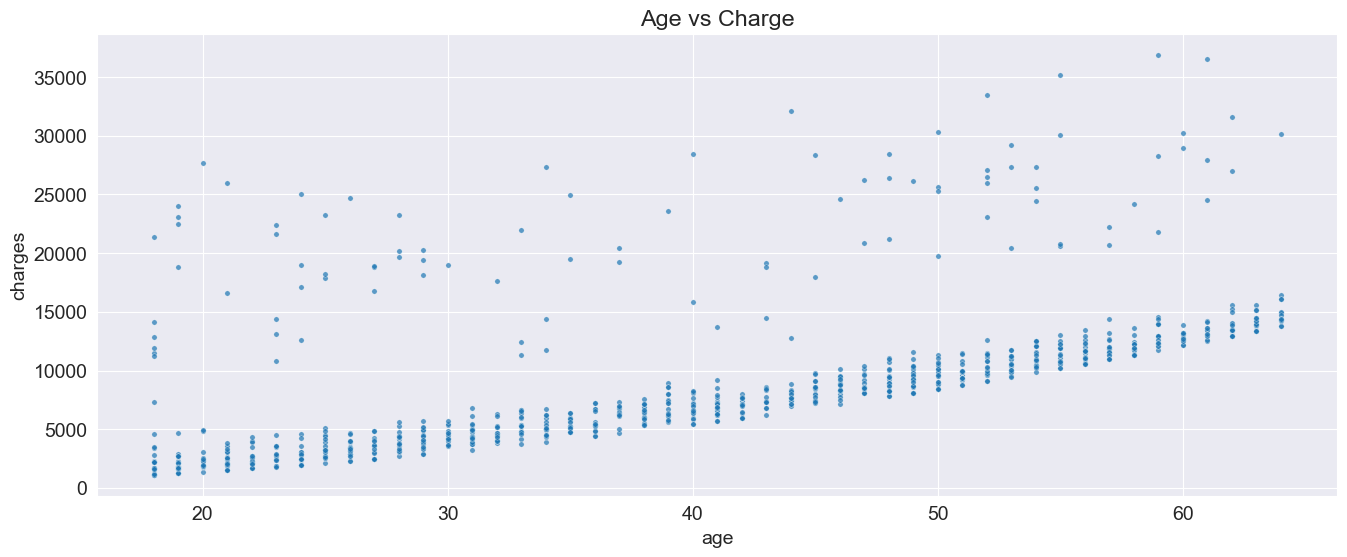

In [26]:
plt.title('Age vs Charge')
sns.scatterplot(data=non_smokers_df,x='age',y='charges',alpha=0.7,s=15)

**First model**

In [27]:
def estimate_chareges(ages,w,b):return w*ages+b
ages=non_smokers_df.age
estimated_chareges=estimate_chareges(ages,220,-5000)
estimated_chareges

1      -1040
2       1160
3       2260
4       2040
5       1820
        ... 
1332    6440
1333    6000
1334   -1040
1335   -1040
1336    -380
Name: age, Length: 1064, dtype: int64

In [28]:
non_smokers_df.charges

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

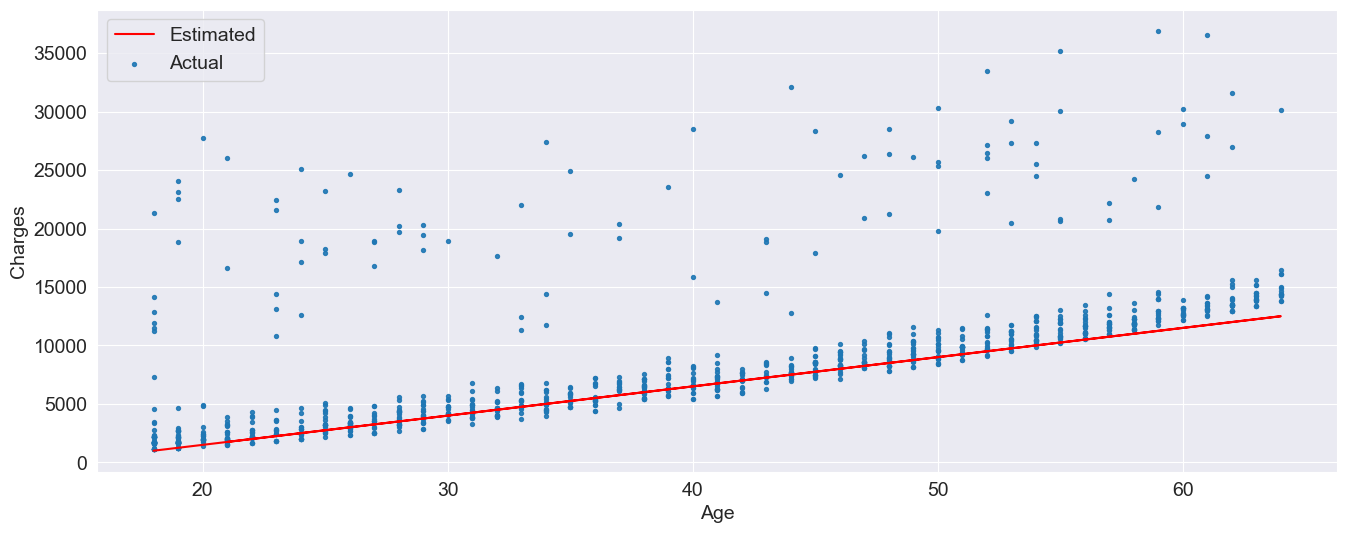

In [29]:
target=non_smokers_df.charges
estimated_chareges=estimate_chareges(ages,250,-3500)
plt.plot(ages,estimated_chareges,'r-')
plt.scatter(ages,target,s=8,alpha=0.9)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(['Estimated','Actual'])

In [30]:
targets=non_smokers_df.charges
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [31]:
predictions=estimated_chareges
predictions

1       1000
2       3500
3       4750
4       4500
5       4250
        ... 
1332    9500
1333    9000
1334    1000
1335    1000
1336    1750
Name: age, Length: 1064, dtype: int64

In [32]:
predictions=estimate_chareges(ages,285,-2500)
targets=non_smokers_df.charges
def rmse(targets,predictions):
    return np.sqrt(np.mean(np.square(targets-predictions)))

rmse(targets=targets,predictions=predictions)


np.float64(4678.228332016178)

In [33]:
def try_parameters(w,b):
    ages=non_smokers_df.age
    targets=non_smokers_df.charges
    predictions=estimate_chareges(ages,w,b)

    plt.plot(ages,predictions,'r',alpha=0.9)
    plt.scatter(ages,targets,s=8,alpha=0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Predicted','Actual'])

    loss=rmse(targets=targets,predictions=predictions)
    print(('RMSE Loss: ',loss))

('RMSE Loss: ', np.float64(8461.949562575493))


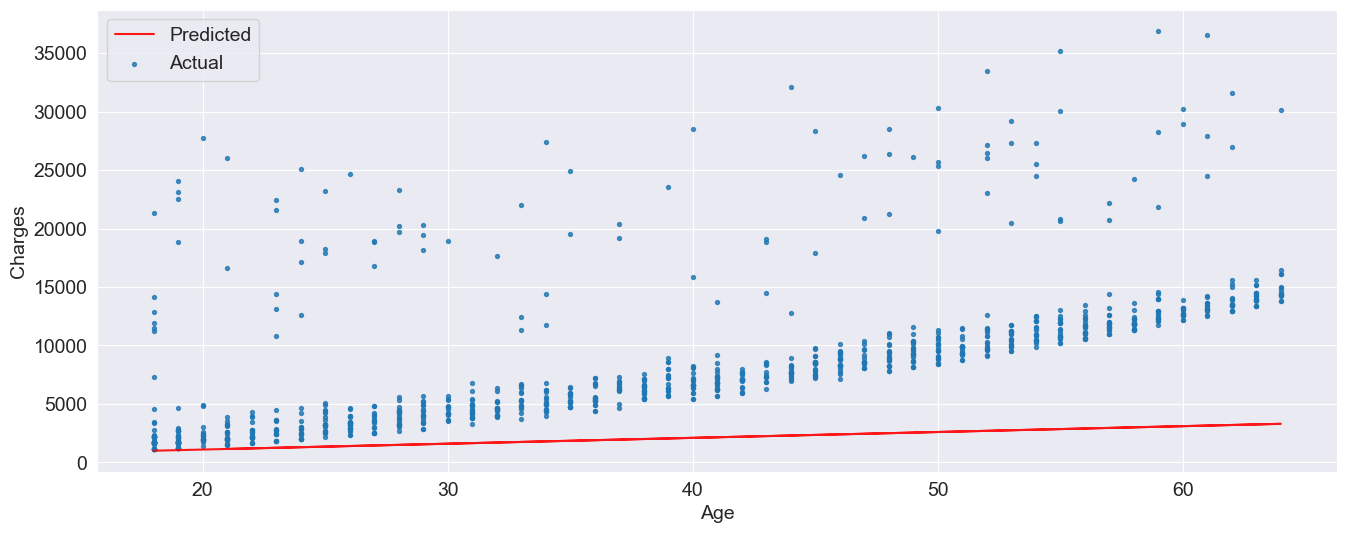

In [34]:
try_parameters(50,100)

('RMSE Loss: ', np.float64(4683.01198552268))


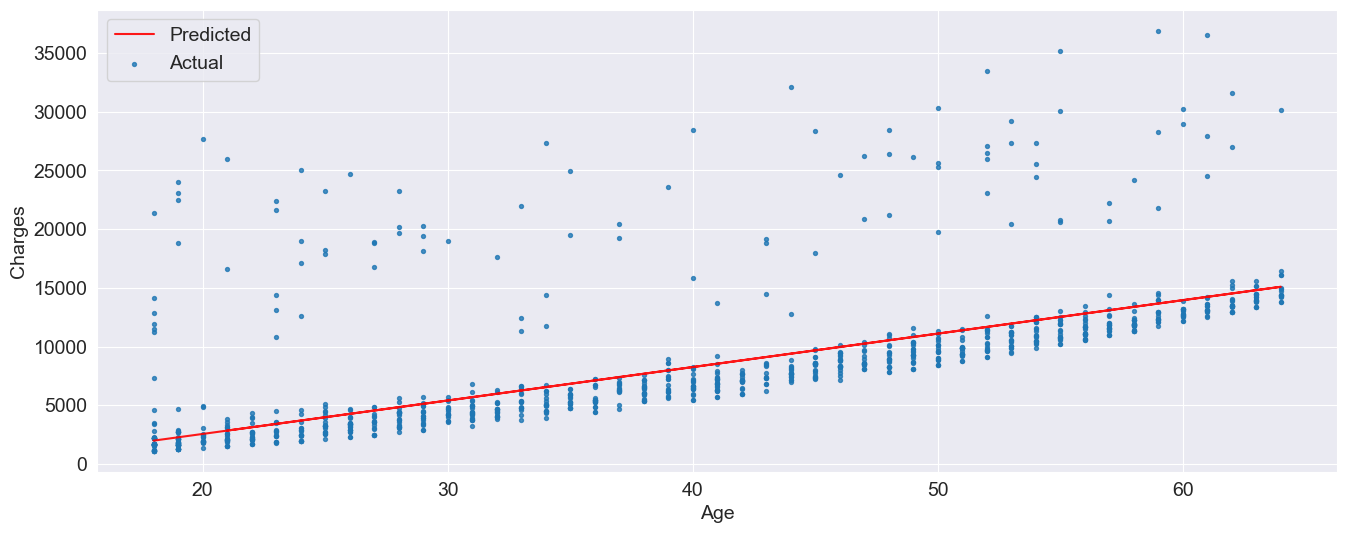

In [35]:
try_parameters(285,-3150)

**Added scikit Linear Regressions**

In [36]:
model=LinearRegression()

In [37]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.

    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.

    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.

    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.

        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.

    Returns
    -------
    self : object
        Fitted Estimator.



In [38]:
inputs=non_smokers_df[['age']]
targets=non_smokers_df.charges
print(type(inputs))
print(inputs.shape)
print(type(targets))
print(targets.shape)


<class 'pandas.core.frame.DataFrame'>
(1064, 1)
<class 'pandas.core.series.Series'>
(1064,)


In [39]:
model.fit(inputs,targets)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [40]:
model.predict(np.array([
    [23],
    [37],
    [61]
]))

d:\ai\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [41]:
predictions=model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289], shape=(1064,))

In [42]:
targets=non_smokers_df.charges
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [43]:
rmse(targets=targets,predictions=predictions)

np.float64(4662.505766636395)

In [44]:
model.coef_

array([267.24891283])

In [45]:
model.intercept_

np.float64(-2091.4205565650864)

In [46]:
def try_two_parameters(w1,b1,w2,b2):
    ages=non_smokers_df.age
    targets=non_smokers_df.charges
    predictions1=estimate_chareges(ages,w1,b1)
    predictions2=estimate_chareges(ages,w2,b2)

    plt.plot(ages,predictions1,'r',alpha=0.9)
    plt.plot(ages,predictions2,'y',alpha=0.9)
    plt.scatter(ages,targets,s=4,alpha=0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Predicted-1','Predicted-2','Actual'])

    loss=rmse(targets=targets,predictions=predictions)
    print(('RMSE Loss: ',loss))

('RMSE Loss: ', np.float64(4662.505766636395))


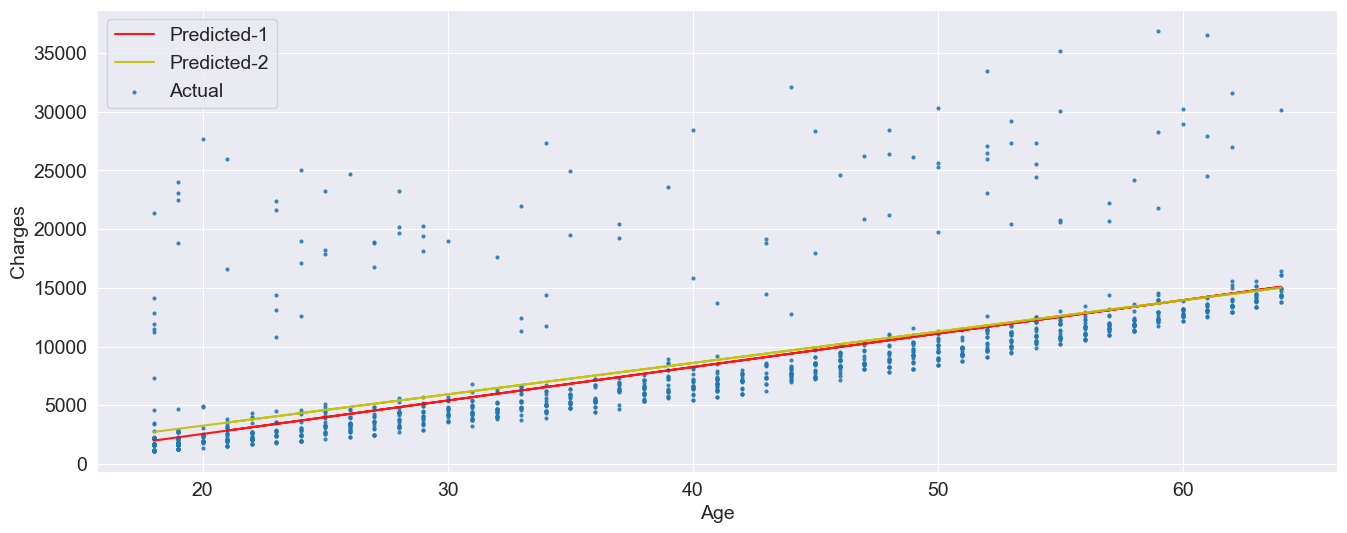

In [47]:
try_two_parameters(285,-3150,model.coef_,model.intercept_)

In [48]:
model_2=SGDRegressor()

In [49]:
inputs=non_smokers_df[['age']]
targets=non_smokers_df.charges
print(type(inputs))
print(inputs.shape)
print(type(targets))
print(targets.shape)
model_2.fit(inputs,targets)

<class 'pandas.core.frame.DataFrame'>
(1064, 1)
<class 'pandas.core.series.Series'>
(1064,)


,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,None


In [50]:
print(model_2.coef_[0])
print(model.intercept_)

155.93052284647905
-2091.4205565650864


('RMSE Loss: ', np.float64(4662.505766636395))


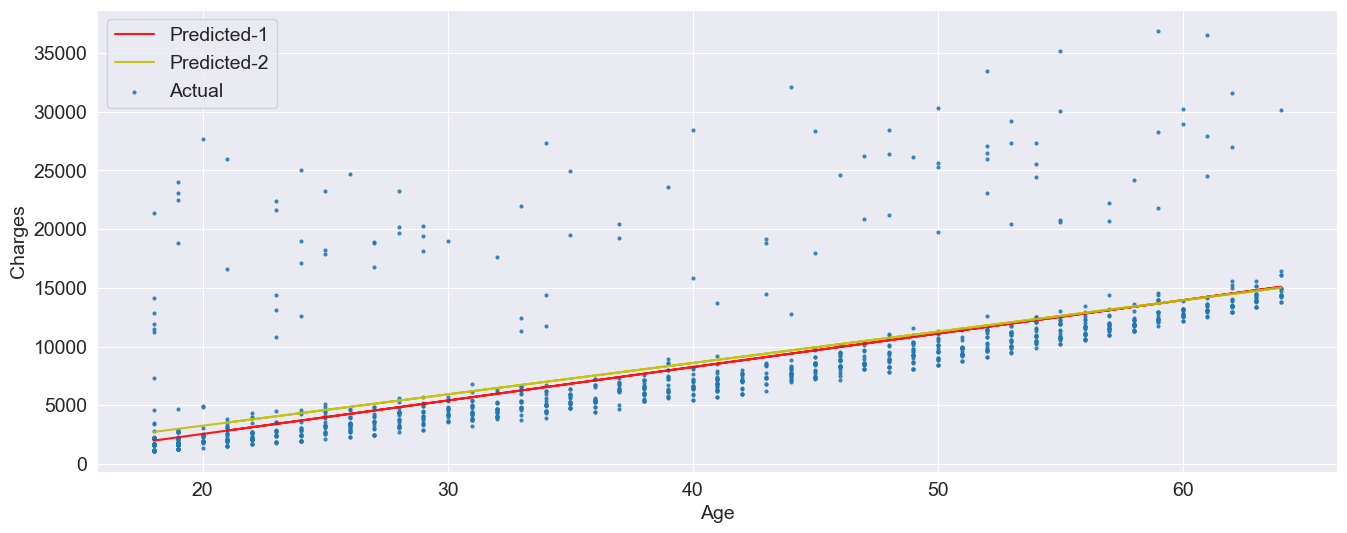

In [51]:
try_two_parameters(285,-3150,model.coef_,model.intercept_)

('RMSE Loss: ', np.float64(4662.505766636395))


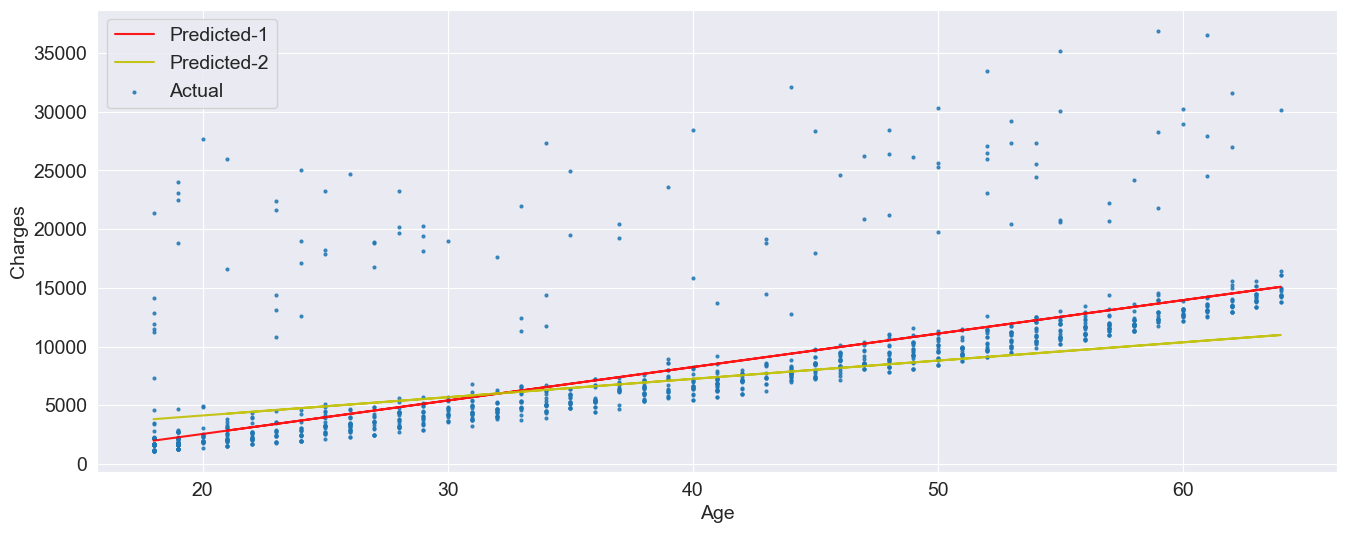

In [52]:
try_two_parameters(285,-3150,model_2.coef_[0],model_2.intercept_)

**Smokers**

In [53]:
smokers_df=medical_df[medical_df.smoker=='yes']

In [54]:
smokers_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630


Text(0.5, 1.0, 'corelation matrix')

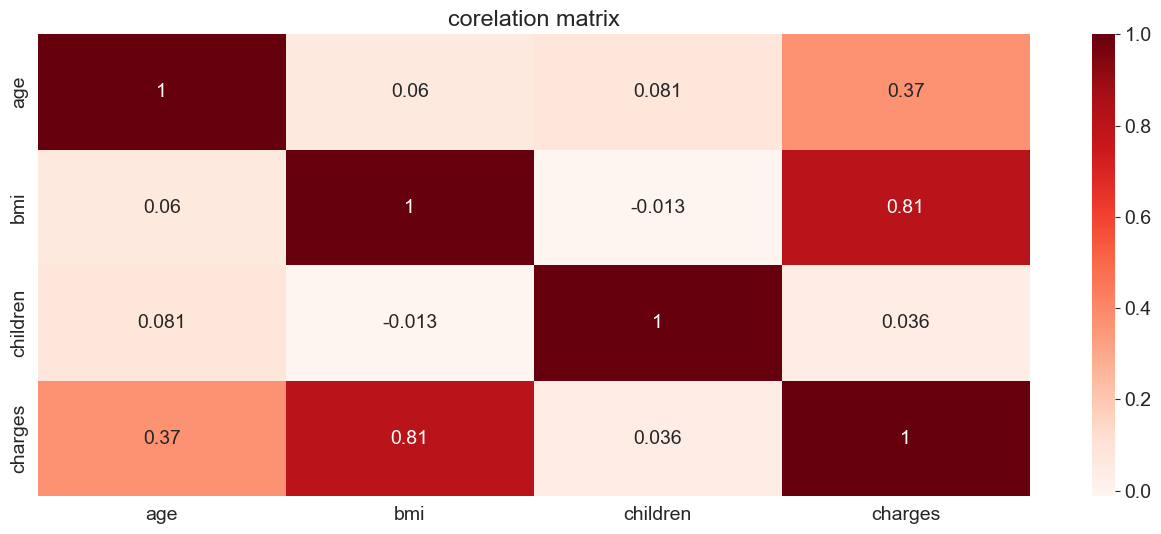

In [55]:
numeric_df = smokers_df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(),cmap='Reds',annot=True)
plt.title('corelation matrix')

In [56]:
inputs=smokers_df[['bmi']]
print(type(inputs))
targets=smokers_df.charges
print(type(targets))
smoker_model_1=LinearRegression().fit(inputs,targets)
smoker_model_2=SGDRegressor().fit(inputs,targets)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [57]:
def estimate_chareges(bmi,w,b):return w*bmi+b

def try_two_parameters(w1,b1,w2,b2):
    bmis=smokers_df.bmi
    targets=smokers_df.charges
    predictions1=estimate_chareges(bmis,w1,b1)
    predictions2=estimate_chareges(bmis,w2,b2)

    plt.plot(bmis,predictions1,'r',alpha=0.9)
    plt.plot(bmis,predictions2,'y',alpha=0.9)
    plt.scatter(bmis,targets,s=4,alpha=0.8)
    plt.xlabel('BMI')
    plt.ylabel('Charges')
    plt.legend(['Predicted-1','Predicted-2','Actual'])

    loss_1=rmse(targets=targets,predictions=predictions1)
    print(('RMSE Loss for FIrst: ',loss_1))

    loss_2=rmse(targets=targets,predictions=predictions2)
    print(('RMSE Loss for Second: ',loss_2))

('RMSE Loss for FIrst: ', np.float64(6811.59740830196))
('RMSE Loss for Second: ', np.float64(107917668.26695842))


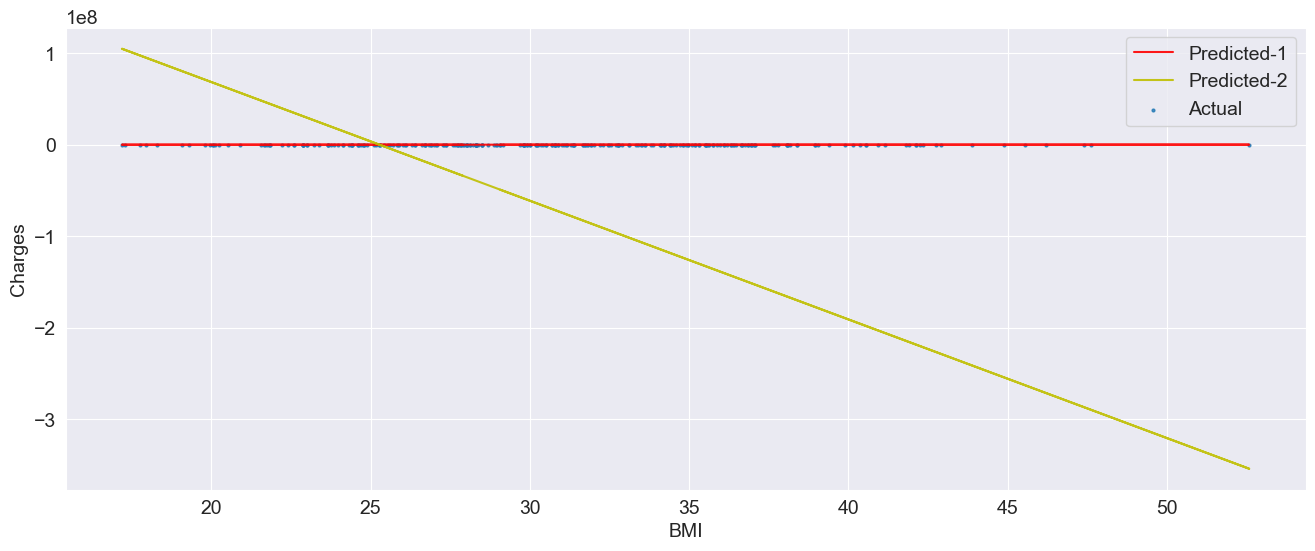

In [58]:
try_two_parameters(smoker_model_1.coef_,smoker_model_1.intercept_,smoker_model_2.coef_,smoker_model_2.intercept_)

**Linear Regression With Multiple Prameters.**

In [59]:
inputs=non_smokers_df[['age','bmi']]
print(type(inputs))
targets=non_smokers_df.charges
print(type(targets))
non_smoker_model_1=LinearRegression().fit(inputs,targets)
non_smoker_model_2=SGDRegressor().fit(inputs,targets)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [60]:
predictions_1=non_smoker_model_1.predict(inputs)
predictions_2=non_smoker_model_2.predict(inputs)
loss_1=rmse(targets=targets,predictions=predictions_1)
loss_2=rmse(targets=targets,predictions=predictions_2)
print(predictions_1)
print(predictions_2)
print(targets)
print('loss-1: ',loss_1)
print('loss-2: ',loss_2)

[2749.08516308 5412.40282772 6673.94368635 ... 2735.99553127 2770.87763119
 3493.32334862]
[1.20311726e+10 1.93168334e+10 2.12530068e+10 ... 1.17125737e+10
 1.25615967e+10 1.28840940e+10]
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64
loss-1:  4662.3128354612945
loss-2:  29347464005.534718


In [61]:
inputs=smokers_df[['age','bmi']]
print(type(inputs))
targets=smokers_df.charges
print(type(targets))
smoker_model_1=LinearRegression().fit(inputs,targets)
smoker_model_2=SGDRegressor().fit(inputs,targets)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [62]:
predictions_1=non_smoker_model_1.predict(inputs)
predictions_2=non_smoker_model_2.predict(inputs)
loss_1=rmse(targets=targets,predictions=predictions_1)
loss_2=rmse(targets=targets,predictions=predictions_2)
print(predictions_1)
print(predictions_2)
print(targets)
print('loss-1: ',loss_1)
print('loss-2: ',loss_2)

[ 2974.42869327 14438.73003699  5210.12535144  5962.42958036
  7006.02078192  6236.38163519  3829.53959803  5436.45944836
  7306.50587422 14001.27411797  7562.98150169 10714.55700775
  7557.53338467 13446.68368288  2734.29741687 12012.71345809
  3202.53165935  5348.58202826  5087.15356712  3843.83206088
  7827.0278892   9877.80696491 13138.80471748 13663.14748986
 15007.93133137 12792.61204598  7984.23457916 14197.53743909
  3242.18970602 14767.87080974  5643.47749399  9670.75354189
  2977.25888393  6372.11425349  6959.18112645  5915.66067965
 10198.45716568  9080.53808182 10689.22680131  2688.27144121
  5964.05693999  9103.39187143  2770.87763119 14786.33780382
  7610.35181792  5167.31871766  7243.32186766  3023.24948221
  9089.52393718  8538.64812733  2982.70700096  4103.98693622
 14715.86605631  2632.48130776 14747.4226822  12359.75518679
 11275.3738623  12889.40456666  3002.87210943  3233.80526618
 11756.02556631  3038.49713441 10282.33694146  8521.52547382
 11292.17811936  8580.39

**Linear Regression With three Prameters.**

In [63]:
inputs=non_smokers_df[['age','bmi','children']]
print(type(inputs))
targets=non_smokers_df.charges
print(type(targets))
non_smoker_model_1=LinearRegression().fit(inputs,targets)
non_smoker_model_2=SGDRegressor().fit(inputs,targets)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [64]:
predictions_1=non_smoker_model_1.predict(inputs)
predictions_2=non_smoker_model_2.predict(inputs)
loss_1=rmse(targets=targets,predictions=predictions_1)
loss_2=rmse(targets=targets,predictions=predictions_2)
print(predictions_1)
print(predictions_2)
print(targets)
print('loss-1: ',loss_1)
print('loss-2: ',loss_2)

[2724.94209163 6535.13457204 6065.27173951 ... 2134.51524931 2160.54349555
 2898.08585583]
[1.09949291e+09 2.59778158e+08 1.23973497e+09 ... 1.50448293e+09
 1.93688110e+09 1.07640820e+09]
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64
loss-1:  4608.470405038246
loss-2:  1856848541.3755686


**Linear Regression With three Prameters for complete dataset.**

In [65]:
inputs=medical_df[['age','bmi','children']]
print(type(inputs))
targets=medical_df.charges
print(type(targets))
model_1=LinearRegression().fit(inputs,targets)
model_2=SGDRegressor().fit(inputs,targets)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [66]:
predictions_1=model_1.predict(inputs)
predictions_2=model_2.predict(inputs)
loss_1=rmse(targets=targets,predictions=predictions_1)
loss_2=rmse(targets=targets,predictions=predictions_2)
print(predictions_1)
print(predictions_2)
print(targets)
print('loss-1: ',loss_1)
print('loss-2: ',loss_2)

[ 6908.77753344  9160.97706103 12390.94691779 ...  9640.92917145
  6691.39141657 17377.08299024]
[14725.41394772   826.9897997  -1882.12305267 ... -4730.868712
 18939.64464526  3806.94161277]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64
loss-1:  11355.317901125973
loss-2:  23034.59444920535


**changing strings into numerical**

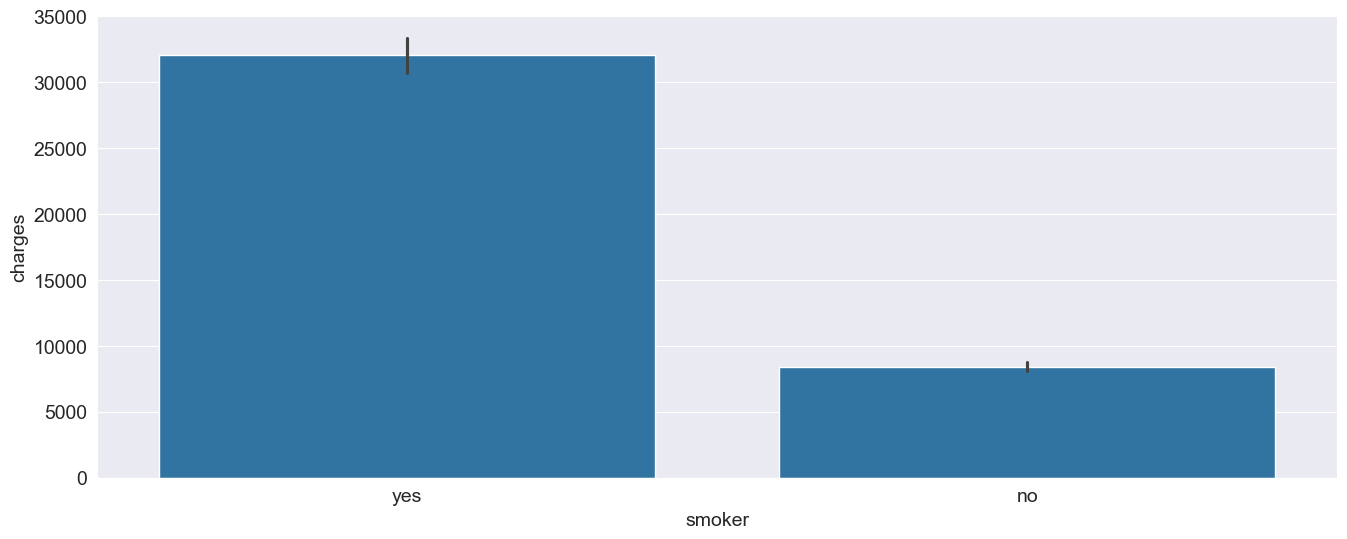

In [67]:
sns.barplot(data=medical_df,x='smoker',y='charges');

In [68]:
smoker_codes={'no':0,'yes':1}
sex_codes={'female':0,'male':1}
medical_df['smoker_code']=medical_df.smoker.map(smoker_codes)
medical_df['sex_code']=medical_df.sex.map(sex_codes)
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


In [69]:
inputs=medical_df[['age','bmi','children','smoker_code']]
print(type(inputs))
targets=medical_df.charges
print(type(targets))
model_1=LinearRegression().fit(inputs,targets)
model_2=SGDRegressor().fit(inputs,targets)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [70]:
predictions_1=model_1.predict(inputs)
predictions_2=model_2.predict(inputs)
loss_1=rmse(targets=targets,predictions=predictions_1)
loss_2=rmse(targets=targets,predictions=predictions_2)
print(predictions_1)
print(predictions_2)
print(targets)
print('loss-1: ',loss_1)
print('loss-2: ',loss_2)

[25587.42524891  3880.94594512  7158.62006921 ...  4398.7459491
  1615.83647369 36793.67069541]
[-6.40921518e+08  4.80279914e+08  3.30954619e+08 ...  1.06929320e+09
 -3.21509941e+08  7.99462035e+08]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64
loss-1:  6056.439217188081
loss-2:  1164197188.920768


In [71]:
inputs=medical_df[['age','bmi','children','smoker_code','sex_code']]
print(type(inputs))
targets=medical_df.charges
print(type(targets))
model_1=LinearRegression().fit(inputs,targets)
model_2=SGDRegressor().fit(inputs,targets)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [72]:
predictions_1=model_1.predict(inputs)
predictions_2=model_2.predict(inputs)
loss_1=rmse(targets=targets,predictions=predictions_1)
loss_2=rmse(targets=targets,predictions=predictions_2)
print(predictions_1)
print(predictions_2)
print(targets)
print('loss-1: ',loss_1)
print('loss-2: ',loss_2)

[25661.85689486  3818.77858262  7096.73025538 ...  4465.88909619
  1676.96948913 36863.89250792]
[ 3.65947380e+09  2.71010589e+09  2.81155818e+09 ...  2.93219773e+09
  1.60275659e+09 -1.47903366e+09]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64
loss-1:  6056.100708754546
loss-2:  2135076762.4534016


In [73]:
enc=preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [74]:
one_hot=enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]], shape=(1338, 4))

In [75]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']]=one_hot
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [76]:
inputs=medical_df[['age','bmi','children','smoker_code','sex_code','northeast', 'northwest', 'southeast', 'southwest']]
print(type(inputs))
targets=medical_df.charges
print(type(targets))
model_1=LinearRegression().fit(inputs,targets)
model_2=SGDRegressor().fit(inputs,targets)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [77]:
predictions_1=model_1.predict(inputs)
predictions_2=model_2.predict(inputs)
loss_1=rmse(targets=targets,predictions=predictions_1)
loss_2=rmse(targets=targets,predictions=predictions_2)
print(predictions_1)
print(predictions_2)
print(targets)
print('loss-1: ',loss_1)
print('loss-2: ',loss_2)

[25293.7130284   3448.60283431  6706.9884907  ...  4149.13248568
  1246.58493898 37085.62326757]
[ 9.80728006e+09  6.63647906e+09 -6.13973027e+09 ...  1.22235466e+10
  9.88011639e+09 -1.93458908e+10]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64
loss-1:  6041.6796511744515
loss-2:  10677534724.060951


**Standardisation**

In [78]:
numeric_cols=['age','bmi','children']
scaler=preprocessing.StandardScaler()
scaler.fit(medical_df[numeric_cols])

,copy,True
,with_mean,True
,with_std,True


In [79]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [80]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [82]:
scaler_input=scaler.transform(medical_df[numeric_cols])
scaler_input

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]], shape=(1338, 3))

In [86]:
cat_cols=['smoker_code','sex_code','northeast', 'northwest', 'southeast', 'southwest']
categorical_data=medical_df[cat_cols].values
categorical_data

array([[1., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0., 0.]], shape=(1338, 6))

In [87]:
inputs=np.concatenate((scaler_input,categorical_data),axis=1)
targets=medical_df.charges
model_1=LinearRegression().fit(inputs,targets)
model_2=SGDRegressor().fit(inputs,targets)

In [88]:
predictions_1=model_1.predict(inputs)
predictions_2=model_2.predict(inputs)
loss_1=rmse(targets=targets,predictions=predictions_1)
loss_2=rmse(targets=targets,predictions=predictions_2)
print(predictions_1)
print(predictions_2)
print(targets)
print('loss-1: ',loss_1)
print('loss-2: ',loss_2)

[25293.7130284   3448.60283431  6706.9884907  ...  4149.13248568
  1246.58493898 37085.62326757]
[25174.45694885  3371.87345628  6664.8408562  ...  4064.2510627
  1215.66765758 37031.15393087]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64
loss-1:  6041.679651174452
loss-2:  6042.002181506643
